<a href="https://colab.research.google.com/github/Marcll0/Python/blob/main/NLP_G1_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install nltk pandas matplotlib wordcloud

In [101]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [89]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Base de dados do G1 por Ano

In [69]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2024
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2024-01-01T00%3A00%3A00-0300&to=2024-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2024 = []
for manchete in manchetes:
    covid2024.append(manchete.text)
for i in range(len(covid2024)):
  covid2024[i] = covid2024[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [70]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2023
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2023-01-01T00%3A00%3A00-0300&to=2023-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2023 = []
for manchete in manchetes:
    covid2023.append(manchete.text)
for i in range(len(covid2023)):
  covid2023[i] = covid2023[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [71]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2022
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2022-01-01T00%3A00%3A00-0300&to=2022-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2022 = []
for manchete in manchetes:
    covid2022.append(manchete.text)
for i in range(len(covid2022)):
  covid2022[i] = covid2022[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [72]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2021
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2021-01-01T00%3A00%3A00-0300&to=2021-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2021 = []
for manchete in manchetes:
    covid2021.append(manchete.text)
for i in range(len(covid2021)):
  covid2021[i] = covid2021[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [73]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2020
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2020-01-01T00%3A00%3A00-0300&to=2020-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2020 = []
for manchete in manchetes:
    covid2020.append(manchete.text)
for i in range(len(covid2020)):
  covid2020[i] = covid2020[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [74]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2025
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2025-01-01T00%3A00%3A00-0300&to=2025-06-10T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2025 = []
for manchete in manchetes:
    covid2025.append(manchete.text)
for i in range(len(covid2025)):
  covid2025[i] = covid2025[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [75]:
print(covid2025)
print(covid2024)
print(covid2023)
print(covid2022)
print(covid2021)
print(covid2020)

['. . Vacinação contra Covid-19 para crianças é retomada em Jundiaí. . Vacinação contra Covid-19 para crianças é retomada em Jundiaí Reprodução/TV Globo A vacinação contra a Covid-19 para crianças. —.  do grupo prioritário para vacinação contra Covid-19 pode ser consultada por meio deste link. Veja mais notícias da região no g1 Sorocaba e Jundiaí VÍDEOS: assista às reportagens da TV TEM. 11/01/2025 17h38.', '. . Covid-19: Divinópolis confirma primeira morte pela doença em 20. .  Divinópolis confirma primeira morte por Covid-19 em 2025 Divinópolis confirmou a primeira morte por Covid-19 no município em 2025. —.  da vacinação e da prevenção, especialmente para pessoas do grupo de risco. Teste rápido mostra resultado positivo de Covid-19. 07/03/2025 18h30.', '. . Paraíba confirma 43 mortes por Covid-19 em 2025. . Vacina bivalente contra a Covid-19 é ampliada para pessoas a partir de 18 anos em cidades do Vale do Paraíba Reprodução/Agência. —.  Brasil A Paraíba confirmou 43 mortes por Covi

In [109]:
delimitador = " "

# Usando join() para transformar a lista em uma string
títulos_2025 = delimitador.join(covid2025)
títulos_2024 = delimitador.join(covid2024)
títulos_2023 = delimitador.join(covid2023)
títulos_2022 = delimitador.join(covid2022)
títulos_2021 = delimitador.join(covid2021)
títulos_2020 = delimitador.join(covid2020)

NLP para análise dos títulos das matérias, por ano;

Analisar  e estudar as maiores frequencias de palavras;

Top 10 palavras mais frequentes:
mortes: 7
anos: 7
pessoas: 6
vacinação: 5
contra: 5
sorocaba: 5
confirma: 5
boletim: 5
sp: 5
casos: 5


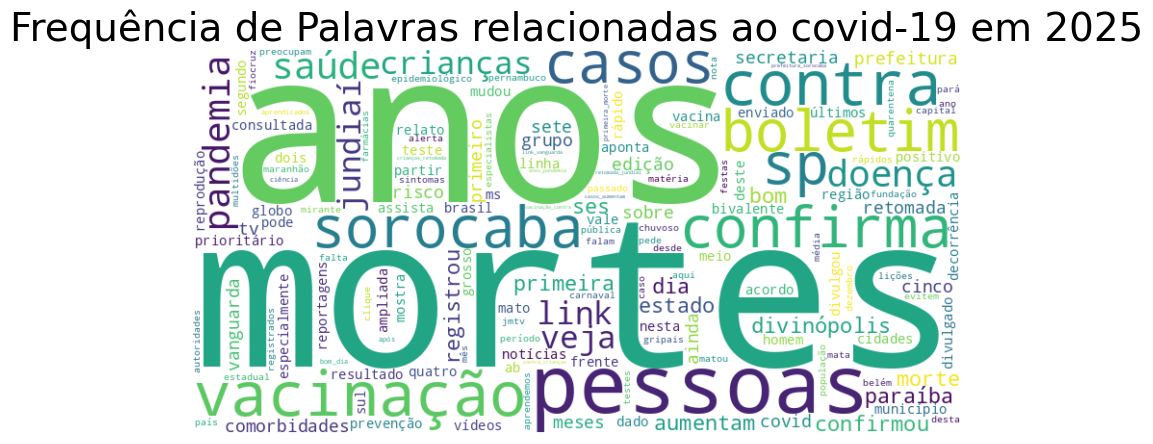

In [102]:
## pré processamento e limpeza

palavras = word_tokenize(títulos_2025.lower())  # transforma em minúsculas e separa palavras
palavras_filtradas = [
    p for p in palavras
    if p.isalpha() and p not in stopwords.words('portuguese')
]

# Unigramas (palavras únicas)
frequencia_unigramas = Counter(palavras_filtradas)

# Bigramas (duplas de palavras)
finder = BigramCollocationFinder.from_words(palavras_filtradas)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

# Frequência dos bigramas (pode refinar com counts se quiser)
frequencia_bigramas = Counter(bigrams_formatados)

# Junta tudo
frequencia_total = frequencia_unigramas + frequencia_bigramas

print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2025", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
contra: 11
vacinação: 9
morte: 7
nesta: 6
prefeitura: 5
sp: 5
santos: 4
jornal: 4
terceira: 4
confirmou: 4


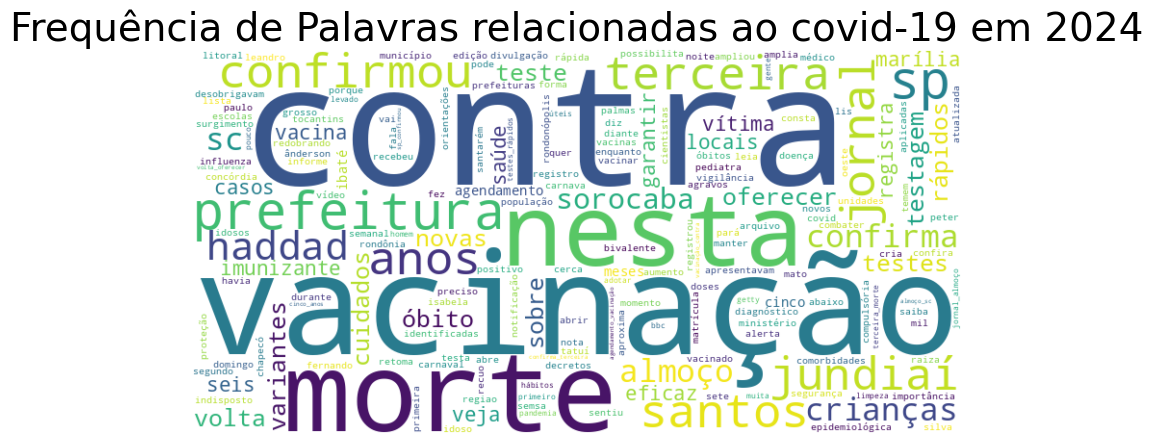

In [103]:
## pré processamento e limpeza

palavras = word_tokenize(títulos_2024.lower())  # transforma em minúsculas e separa palavras
palavras_filtradas = [
    p for p in palavras
    if p.isalpha() and p not in stopwords.words('portuguese')
]

# Unigramas (palavras únicas)
frequencia_unigramas = Counter(palavras_filtradas)

# Bigramas (duplas de palavras)
finder = BigramCollocationFinder.from_words(palavras_filtradas)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

# Frequência dos bigramas (pode refinar com counts se quiser)
frequencia_bigramas = Counter(bigrams_formatados)

# Junta tudo
frequencia_total = frequencia_unigramas + frequencia_bigramas

print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2024", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
contra: 20
vacinação: 12
casos: 10
gripe: 9
novos: 9
vacina: 8
saúde: 7
doses: 6
registra: 6
sergipe: 5


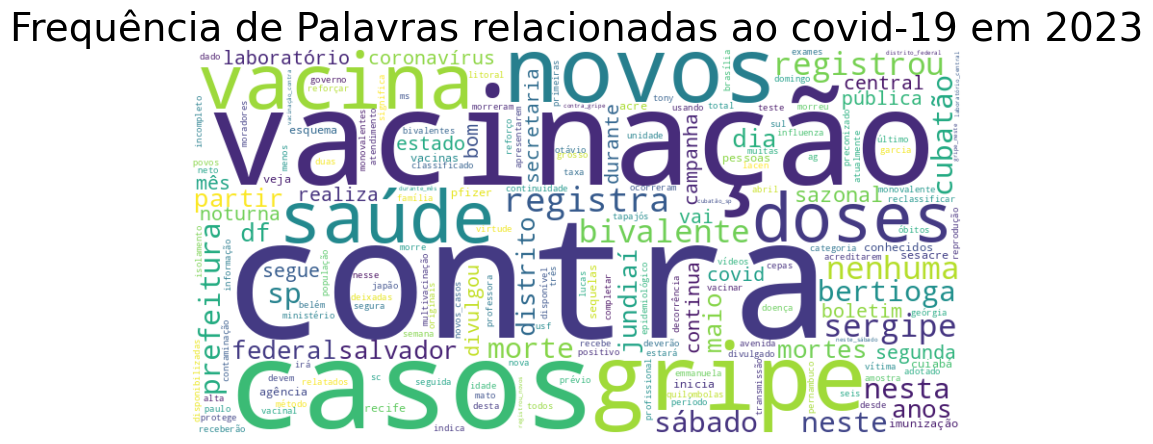

In [106]:
## pré processamento e limpeza

palavras = word_tokenize(títulos_2023.lower())  # transforma em minúsculas e separa palavras
palavras_filtradas = [
    p for p in palavras
    if p.isalpha() and p not in stopwords.words('portuguese')
]

# Unigramas (palavras únicas)
frequencia_unigramas = Counter(palavras_filtradas)

# Bigramas (duplas de palavras)
finder = BigramCollocationFinder.from_words(palavras_filtradas)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

# Frequência dos bigramas (pode refinar com counts se quiser)
frequencia_bigramas = Counter(bigrams_formatados)

# Junta tudo
frequencia_total = frequencia_unigramas + frequencia_bigramas

print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2023", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
casos: 10
positivo: 9
nesta: 7
contra: 6
margareth: 4
testa: 4
testou: 4
agudos: 4
secretaria: 4
saúde: 4


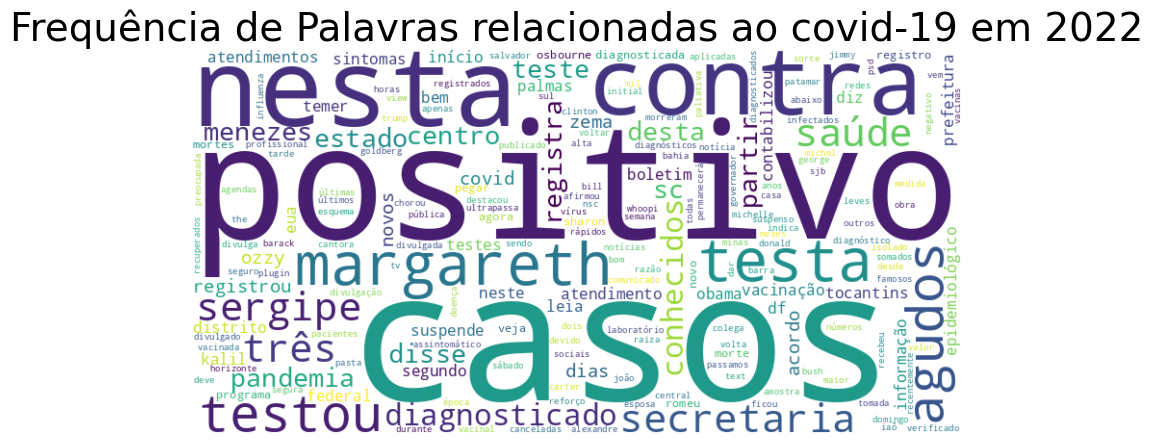

In [107]:
## pré processamento e limpeza

palavras = word_tokenize(títulos_2022.lower())  # transforma em minúsculas e separa palavras
palavras_filtradas = [
    p for p in palavras
    if p.isalpha() and p not in stopwords.words('portuguese')
]

# Unigramas (palavras únicas)
frequencia_unigramas = Counter(palavras_filtradas)

# Bigramas (duplas de palavras)
finder = BigramCollocationFinder.from_words(palavras_filtradas)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

# Frequência dos bigramas (pode refinar com counts se quiser)
frequencia_bigramas = Counter(bigrams_formatados)

# Junta tudo
frequencia_total = frequencia_unigramas + frequencia_bigramas

print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2022", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
cpi: 16
covid: 15
natuza: 12
nery: 12
especial: 7
comenta: 6
tese: 4
explica: 4
porque: 4
pandemia: 3


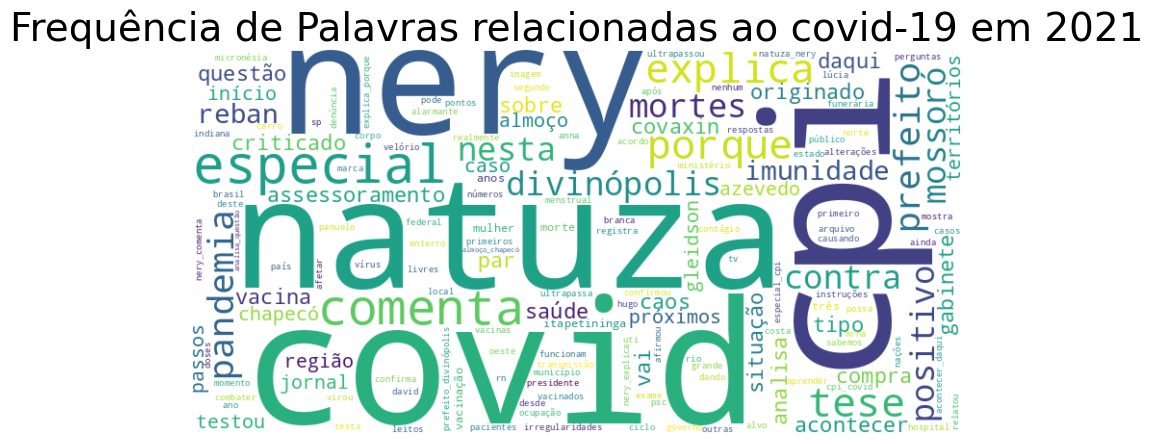

In [108]:
## pré processamento e limpeza

palavras = word_tokenize(títulos_2021.lower())  # transforma em minúsculas e separa palavras
palavras_filtradas = [
    p for p in palavras
    if p.isalpha() and p not in stopwords.words('portuguese')
]

# Unigramas (palavras únicas)
frequencia_unigramas = Counter(palavras_filtradas)

# Bigramas (duplas de palavras)
finder = BigramCollocationFinder.from_words(palavras_filtradas)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

# Frequência dos bigramas (pode refinar com counts se quiser)
frequencia_bigramas = Counter(bigrams_formatados)

# Junta tudo
frequencia_total = frequencia_unigramas + frequencia_bigramas

print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2021", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
coronavírus: 6
morte: 5
sobre: 4
mumuzinho: 4
novo: 4
registra: 4
positivo: 3
doença: 3
prefeitura: 3
enfermeiro: 3


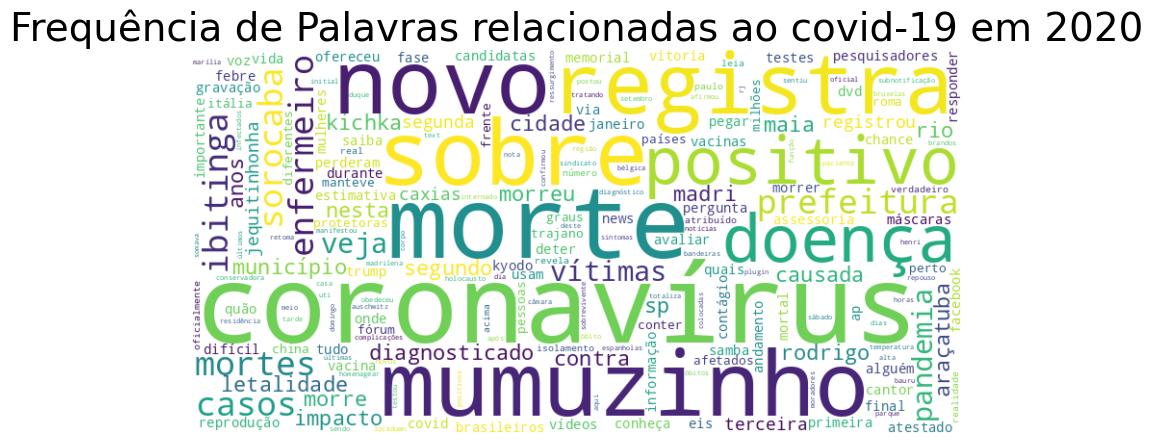

In [110]:
## pré processamento e limpeza

palavras = word_tokenize(títulos_2020.lower())  # transforma em minúsculas e separa palavras
palavras_filtradas = [
    p for p in palavras
    if p.isalpha() and p not in stopwords.words('portuguese')
]

# Unigramas (palavras únicas)
frequencia_unigramas = Counter(palavras_filtradas)

# Bigramas (duplas de palavras)
finder = BigramCollocationFinder.from_words(palavras_filtradas)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

# Frequência dos bigramas (pode refinar com counts se quiser)
frequencia_bigramas = Counter(bigrams_formatados)

# Junta tudo
frequencia_total = frequencia_unigramas + frequencia_bigramas

print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2020", fontsize=28, loc='center')
plt.show()